Code for "Towards Robust Online Sexism Detection: A Multi-Model Approach with BERT, XLM-RoBERTa, and DistilBERT for EXIST 2023 Tasks"

Hadi Mohammadi , Anastasia Giachanou1 and Ayoub Bagheri1. 

Department of Methodology and Statistics, Utrecht University, The Netherlands.


Abstract 
This research investigates the application of pre-trained transformer-based models, including BERT, XLM- RoBERTa, and DistilBERT, in the context of the EXIST 2023 shared task, which focuses on identifying and categorizing online sexism. The study emphasizes the crucial role of Natural Language Processing (NLP) in detecting harmful content, and it draws on previous competitions that have incorporated tasks to detect hate speech and abusive language. The methodology combines various advanced techniques from the text classification domain, including the use of additional datasets, data preprocessing, and model building. The research also explores data augmentation techniques and label encoding as preprocessing steps. The study’s findings indicate that the developed model performs optimally in English, and it suggests that the use of a voting system and the combination of outputs from multiple models contribute to the overall performance. The research concludes with a call for sustained initiatives to curb the prevalence of harmful content on digital platforms, and it outlines future work directions, including incorporating additional information about annotators, the assessment of annotator reliability, and exploring more sophisticated techniques for handling imbalances. 

Keywords   
Online Sexism, Natural Language Processing (NLP), Transformer-based Models, BERT. 

In [1]:
path = '/notebooks/Hadi/EXIST2023_training.json'
additional_path = '/notebooks/Hadi/train_all_tasks.csv'
test_path='/notebooks/Hadi/EXIST2023_test_clean.json'
#test_path='/notebooks/Hadi/EXIST2023_test_clean-Copy2.json'

In [2]:
# Install packages
!pip install -U transformers
#!pip install transformers
!pip install keras-tuner
!pip install tensorflow
!pip install -U scikit-learn scipy matplotlib
!pip install -U imbalanced-learn
!pip install nlpaug
!pip install nltk
!pip install wordnet
!pip install scikit-multilearn
!pip install tensorflow
!pip install keras_tuner


#!pip install --upgrade pandas

#Import library
import json
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
#import tensorflow-gpu as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import matplotlib.pyplot as plt



import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

from imblearn.over_sampling import RandomOverSampler, SMOTE
from nlpaug.augmenter.char import RandomCharAug
from nlpaug.augmenter.word import SynonymAug, RandomWordAug

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

from transformers import BertModel
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model

from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import IterativeStratification
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import IterativeStratification
from imblearn.over_sampling import SMOTE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import IterativeStratification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import itertools
import keras_tuner as kt

from transformers import TFBertModel
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

from tensorflow.keras import layers, models, optimizers, losses


from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.layers import Input

from keras.preprocessing.text import Tokenizer
from transformers import BertTokenizer

from transformers import BertTokenizerFast


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 88.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 55.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.12.0
    Uninstalling huggingface-hub-0.12.0:
      Successfully uninstalled huggingface-hub-0.12.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.21.3
    Uninstalling transformers-4.21.3:
      Successfully uninstalled transformers-4.21.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 53.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.2
    Uninstalling scipy-1.9.2:
 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Install packages
#!pip install -U transformers
#!pip install transformers
!pip install keras-tuner
!pip install tensorflow
!pip install -U scikit-learn scipy matplotlib
!pip install -U imbalanced-learn
!pip install nlpaug
!pip install nltk
!pip install wordnet
!pip install scikit-multilearn
!pip install tensorflow
!pip install keras_tuner
#!pip install tensorflow transformers[tf-cpu]

#!pip install --upgrade pandas

#Import library
import json
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
#import tensorflow-gpu as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import matplotlib.pyplot as plt

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

from imblearn.over_sampling import RandomOverSampler, SMOTE
from nlpaug.augmenter.char import RandomCharAug
from nlpaug.augmenter.word import SynonymAug, RandomWordAug

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

from transformers import BertModel
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model

from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import IterativeStratification
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import IterativeStratification
from imblearn.over_sampling import SMOTE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import IterativeStratification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import itertools
import keras_tuner as kt

from transformers import TFBertModel
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

from tensorflow.keras import layers, models, optimizers, losses


from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.layers import Input

from keras.preprocessing.text import Tokenizer
from transformers import BertTokenizer

from transformers import BertTokenizerFast

from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import math

import itertools
import numpy as np
import tensorflow as tf
from transformers import BertTokenizerFast, TFBertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.mixed_precision import Policy
from transformers import TFBertModel, TFDistilBertModel
from sklearn.metrics import label_ranking_average_precision_score, f1_score, precision_score, recall_score

import nltk
nltk.download('omw-1.4')

# Check if a GPU is available
num_gpus = len(tf.config.list_physical_devices('GPU'))
if num_gpus > 0:
    print(f"Num GPUs Available: {num_gpus}. Using GPU for computation.")
else:
    print("No GPUs available. Falling back to CPU for computation.")


# List available GPUs
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    # Use the first GPU
    gpu = gpus[0]
    tf.config.experimental.set_visible_devices(gpu, 'GPU')
    print(f"Using GPU: {gpu}")
else:
    print("No GPUs available. Falling back to CPU for computation.")
    


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_32/3337093899.py:46: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Num GPUs Available: 1. Using GPU for computation.
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


Single Model (New version)

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

#sample_size=100000
max_length=256
MAX_LENGTH = 128
num_folds = 2

batch_size_values=[32]
#batch_size_values=[16, 32,64]

# Set parameters
num_epochs = 3
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2'][0]
        label3 = data[tweet]['labels_task3'][0]
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)


# Concatenate the datasets based on id, text, label 1, and lang, source
#df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

def compute_multilabel_metrics(y_test, y_pred_scores):
    # Convert the predicted scores to binary predictions using a threshold (e.g., 0.5)
    y_pred = (y_pred_scores > 0.5).astype(int)
    
    # Compute the metrics
    lraps = label_ranking_average_precision_score(y_test, y_pred_scores)
    precision =

# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Define a function to calculate class weights
def calculate_class_weights(y):
    class_counts = y.sum(axis=0)
    total_samples = y.shape[0]
    weights = total_samples / (class_counts + np.finfo(np.float32).eps)
    return weights

#def confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    unique_classes = np.unique(np.concatenate((np.unique(y_true), np.unique(y_pred))))
    cm = cm[:len(unique_classes), :len(unique_classes)]  # Crop the confusion matrix to match unique classes

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes[unique_classes],
           yticklabels=classes[unique_classes],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Convert the 'label1' column to a list of strings
labels_as_strings = [''.join(str(x) for x in label) for label in train_df_augmented['label1']]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit the OneHotEncoder and transform the labels
labels_one_hot = encoder.fit_transform(np.array(labels_as_strings).reshape(-1, 1))

num_labels = labels_one_hot.shape[1]

# Split the data into training and testing sets
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, labels_one_hot, test_size=0.2, stratify=labels_one_hot, random_state=42)

#Tokenize the extra information and add it to the tokenized input of the tweet text:
def tokenize_and_combine(texts, extra_infos, tokenizer):
    text_encodings = tokenizer([str(x) for x in texts], truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='tf')
    extra_info_encodings = tokenizer([str(x) for x in extra_infos], truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='tf')
    combined_encodings = {key: np.hstack((text_encodings[key], extra_info_encodings[key])) for key in text_encodings.keys()}

    return combined_encodings

tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

train_combined_encodings = tokenize_and_combine(X_train_fold['text'], X_train_fold['extra_info'], tokenizer)
test_combined_encodings = tokenize_and_combine( X_test_fold['text'], X_test_fold['extra_info'], tokenizer)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_combined_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_combined_encodings.items()}

# Convert to tensor
y_train_task1 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_test_task1 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"], "extra_info_input": train_encodings["attention_mask"]}
test_input_data = {"text_input": test_encodings["input_ids"], "extra_info_input": test_encodings["attention_mask"]}

# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")
    extra_info_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="extra_info_input")

    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=num_labels, trainable=True)

    text_output = bert_model(text_input)
    extra_info_output = bert_model(extra_info_input)

    concat_output = Concatenate(axis=-1)([text_output[1], extra_info_output[1]])

    classification_output = Dense(num_labels, activation='softmax')(concat_output)

    model = Model(inputs=[text_input, extra_info_input], outputs=[classification_output])

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Changed loss and metric for multiclass classification
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

    metric = tf.keras.metrics.CategoricalAccuracy('accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Rest of my code

In [62]:
#num_labels=64
#Define the tuner and search space
tuner=RandomSearch( build_model, objective="val_accuracy", max_trials=3, executions_per_trial=1, directory="tuner_results", project_name="bert_hyperparameter_tuning", )

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(train_input_data, y_train_task1, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping, scheduler])

#Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("train_input_data['extra_info_input'].shape:", train_input_data['extra_info_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_input_data, y_train_task1, epochs=num_epochs, batch_size=best_hps.get("batch_size"), validation_split=0.1, callbacks=[early_stopping, scheduler])


# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Make predictions
y_pred_proba = model.predict([test_input_data['text_input'], test_input_data['extra_info_input']])
y_pred = np.argmax(y_pred_proba, axis=-1)

# Compute the metrics
accuracy, precision, recall, f1 = compute_multilabel_metrics(y_test_task1, y_pred)

# Convert predictions to label names
y_pred_labels = encoder.inverse_transform(y_pred.reshape(-1, 1))

# Get the probability of the predicted label
y_pred_prob = [proba[pred] for pred, proba in zip(y_pred, y_pred_proba)]

# Combine the predicted label and its probability
predictions = list(zip(y_pred_labels, y_pred_prob))
print(predictions)
print("-----------------------------------------------")

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")
print("-----------------------------------------------")

# Plot confusion matrix
y_test_task1_multiclass = np.argmax(y_test_task1, axis=1)
#plot_confusion_matrix(y_test_task1_multiclass, y_pred, encoder.classes_) # Modified to use the OneHotEncoder instead of LabelEncoder
print("------------------------------------------------")

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")
print("-----------------------------------------------")


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json
Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (16608, 256)
train_input_data['extra_info_input'].shape: (16608, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
468/468 [==============================] - 290s 566ms/step - loss: 4.1989 - accuracy: 0.0153 - val_loss: 4.1924 - val_accuracy: 0.0042 - lr: 0.0000e+00
Epoch 2/3
468/468 [==============================] - 260s 555ms/step - loss: 3.5480 - accuracy: 0.2029 - val_loss: 3.4972 - val_accuracy: 0.2119 - lr: 2.3923e-05
Epoch 3/3
130/130 [==============================] - 22s 172ms/step - loss: 3.5088 - accuracy: 0.2129
Test loss: 3.508809804916382, Test accuracy: 0.21290944516658783
------------------------------------------------
130/130 [==============================] - 26s 169ms/step


ValueError: y_true and y_score have different shape

In [89]:
#New Code:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

#sample_size=100000
max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
batch_size_values=[16, 32,64]

# Set parameters
num_epochs = 3
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2'][0]
        label3 = data[tweet]['labels_task3'][0]
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)


# Concatenate the datasets based on id, text, label 1, and lang, source
#df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def majority_voting(row):
    num_yes = sum(label == 'YES' for label in row)
    num_no = sum(label == 'NO' for label in row)
    return 'YES' if num_yes > num_no else 'NO'

# Apply majority voting to each row in the 'label1' column
majority_labels = train_df_augmented['label1'].apply(majority_voting)

# Now you can fit the LabelEncoder on this 1D array-like input
binary_labels = label_encoder.fit_transform(majority_labels)


# Convert labels into binary values (1 for 'YES', 0 for 'NO')
#label_encoder = LabelEncoder()
#binary_labels = label_encoder.fit_transform(train_df_augmented['label1']) # assumes 'label1' is now a single column with 'YES' or 'NO' 

# Parse 'extra_info' into separate columns
#extra_info_df = train_df_augmented['extra_info'].str.split('_', expand=True)
#extra_info_df.columns = ['age', 'gender', 'annotator_id', 'age_group']

# One-hot encode the categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
#extra_info_one_hot = one_hot_encoder.fit_transform(extra_info_df[['gender', 'age_group']])

# Concatenate the one-hot encoded columns with the rest of your data
#train_df_augmented = pd.concat([train_df_augmented, pd.DataFrame(extra_info_one_hot)], axis=1)


# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Convert these to binary labels (1 for 'YES', 0 for 'NO') based on majority voting
labels_as_binary = [1 if label.count('YES') > label.count('NO') else 0 for label in train_df_augmented['label1']]

# Split the data into training and testing sets
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, labels_as_binary, test_size=0.2, stratify=labels_as_binary, random_state=42)

# Your tokenizer setup remains the same
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

# Convert 'text' column to string and then tokenize
#train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding=True)
#test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding=True)

train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)
test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

# Convert to tensor
y_train_task1 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_test_task1 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    #bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=1, trainable=True)
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=1, trainable=True, max_length=300)


    text_output = bert_model(text_input)

    concat_output = text_output[1]


    classification_output = layers.Dense(1, activation='sigmoid')(concat_output)

    model = Model(inputs=text_input, outputs=classification_output)

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Change loss and metric for binary classification
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    metric = tf.keras.metrics.BinaryAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

In [90]:
# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning", 
)

# Set the number of epochs and search for the best hyperparameters
num_epochs = 2
tuner.search_space_summary()
    
tuner.search(
    train_input_data, 
    y_train_task1, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data, 
    y_train_task1, 
    epochs=num_epochs, 
    batch_size=best_hps.get("batch_size"), 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Make predictions
y_pred_proba = model.predict(test_input_data['text_input'])

y_pred = np.argmax(y_pred_proba, axis=-1)

# Compute the metrics
accuracy, precision, recall, f1 = compute_multilabel_metrics(y_test_task1, y_pred)

# Convert predictions to label names
y_pred_labels = encoder.inverse_transform(y_pred.reshape(-1, 1))

# Get the probability of the predicted label
y_pred_prob = [proba[pred] for pred, proba in zip(y_pred, y_pred_proba)]

# Combine the predicted label and its probability
predictions = list(zip(y_pred_labels, y_pred_prob))
print(predictions)
print("-----------------------------------------------")

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")
print("-----------------------------------------------")

# Plot confusion matrix
y_test_task1_multiclass = np.argmax(y_test_task1, axis=1)
#plot_confusion_matrix(y_test_task1_multiclass, y_pred, encoder

INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json
Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (16608, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/2
468/468 [==============================] - 158s 307ms/step - loss: 0.6788 - accuracy: 0.6004 - val_loss: 0.6817 - val_accuracy: 0.6069 - lr: 0.0000e+00
Epoch 2/2
130/130 [==============================] - 12s 95ms/step - loss: 0.6035 - accuracy: 0.6855
Test loss: 0.603527843952179, Test accuracy: 0.6854528188705444
------------------------------------------------
130/130 [==============================] - 14s 94ms/step


ValueError: binary format is not supported

In [100]:
#with aditional information
#New Code:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

#sample_size=100000
max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
batch_size_values=[16, 32,64]

# Set parameters
num_epochs = 3
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2'][0]
        label3 = data[tweet]['labels_task3'][0]
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)


# Concatenate the datasets based on id, text, label 1, and lang, source
df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def majority_voting(row):
    num_yes = sum(label == 'YES' for label in row)
    num_no = sum(label == 'NO' for label in row)
    return 'YES' if num_yes > num_no else 'NO'

# Apply majority voting to each row in the 'label1' column
majority_labels = train_df_augmented['label1'].apply(majority_voting)

# Now you can fit the LabelEncoder on this 1D array-like input
binary_labels = label_encoder.fit_transform(majority_labels)


# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Convert these to binary labels (1 for 'YES', 0 for 'NO') based on majority voting
labels_as_binary = [1 if label.count('YES') > label.count('NO') else 0 for label in train_df_augmented['label1']]

# Split the data into training and testing sets
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, labels_as_binary, test_size=0.2, stratify=labels_as_binary, random_state=42)

# Your tokenizer setup remains the same
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

# Convert 'text' column to string and then tokenize
train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)
test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

# Convert to tensor
y_train_task1 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_test_task1 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    #bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=1, trainable=True)
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=1, trainable=True, max_length=300)


    text_output = bert_model(text_input)

    concat_output = text_output[1]


    classification_output = layers.Dense(1, activation='sigmoid')(concat_output)

    model = Model(inputs=text_input, outputs=classification_output)

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Change loss and metric for binary classification
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    metric = tf.keras.metrics.BinaryAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning", 
)

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(
    train_input_data, 
    y_train_task1, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data, 
    y_train_task1, 
    epochs=num_epochs, 
    batch_size=best_hps.get("batch_size"), 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Make predictions
y_pred_proba = model.predict(test_input_data['text_input'])

y_pred = np.argmax(y_pred_proba, axis=-1)

# Compute the metrics
accuracy, precision, recall, f1 = compute_multilabel_metrics(y_test_task1, y_pred)

# Convert predictions to label names
y_pred_labels = encoder.inverse_transform(y_pred.reshape(-1, 1))

# Get the probability of the predicted label
y_pred_prob = [proba[pred] for pred, proba in zip(y_pred, y_pred_proba)]

# Combine the predicted label and its probability
predictions = list(zip(y_pred_labels, y_pred_prob))
print(predictions)
print("-----------------------------------------------")

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")
print("-----------------------------------------------")

# Plot confusion matrix
y_test_task1_multiclass = np.argmax(y_test_task1, axis=1)
#plot_confusion_matrix(y_test_task1_multiclass, y_pred, encoder


KeyboardInterrupt



INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (50208, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the

Epoch 1/4


/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/indexed_slices.py:436: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 192001536 elements. This may consume a large amount of memory.
  warnings.warn(


1413/1413 [==============================] - 590s 393ms/step - loss: 0.7232 - accuracy: 0.5924 - val_loss: 0.6596 - val_accuracy: 0.7042 - lr: 0.0000e+00
Epoch 2/4
1413/1413 [==============================] - 545s 386ms/step - loss: 0.5828 - accuracy: 0.7289 - val_loss: 0.5251 - val_accuracy: 0.7634 - lr: 2.5924e-05
Epoch 3/4
1413/1413 [==============================] - 544s 385ms/step - loss: 0.5082 - accuracy: 0.7715 - val_loss: 0.5259 - val_accuracy: 0.7562 - lr: 1.5304e-05
Epoch 4/4
393/393 [==============================] - 42s 108ms/step - loss: 0.5102 - accuracy: 0.7721
Test loss: 0.5102220177650452, Test accuracy: 0.7721478939056396
------------------------------------------------


INFO:tensorflow:Assets written to: my_model1.2/assets


INFO:tensorflow:Assets written to: my_model1.2/assets


393/393 [==============================] - 53s 107ms/step
Accuracy: 0.7721478648820905
Precision: 0.616282462795448
Recall: 0.5775225594749795
F1 Score: 0.596273291925466


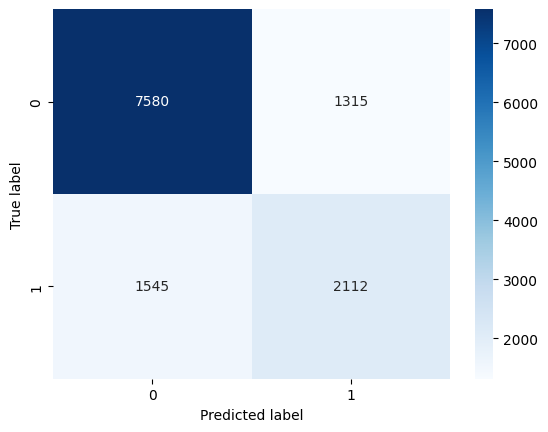

In [110]:
#Here
#with aditional information+ voting system (several models)
#New Code:
num_labels=1

from transformers import (
    BertTokenizer, TFBertForSequenceClassification, BertModel, TFBertModel,
    XLMRobertaTokenizerFast, TFXLMRobertaModel, GPT2Tokenizer, TFGPT2Model,
    DistilBertTokenizer, TFDistilBertModel, BertTokenizerFast
)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

from keras.regularizers import l1, l2
from keras.layers import Dropout
from tensorflow.keras import metrics

#sample_size=100000
max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
batch_size_values=[16, 32,64]

# Set parameters
num_epochs = 4
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2']
        label3 = data[tweet]['labels_task3']
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

#additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)
additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'sexist' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)


# Concatenate the datasets based on id, text, label 1, and lang, source
df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def majority_voting(row):
    num_yes = sum(label == 'YES' for label in row)
    num_no = sum(label == 'NO' for label in row)
    return 'YES' if num_yes > num_no else 'NO'

# Apply majority voting to each row in the 'label1' column
majority_labels = train_df_augmented['label1'].apply(majority_voting)

# Now you can fit the LabelEncoder on this 1D array-like input
label_encoder = LabelEncoder()
binary_labels = label_encoder.fit_transform(majority_labels)


# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Convert these to binary labels (1 for 'YES', 0 for 'NO') based on majority voting
labels_as_binary = [1 if label.count('YES') > label.count('NO') else 0 for label in train_df_augmented['label1']]

# Split the data into training and testing sets
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, labels_as_binary, test_size=0.2, stratify=labels_as_binary, random_state=42)

# Your tokenizer setup remains the same
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

# Convert 'text' column to string and then tokenize
train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)
test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

# Convert to tensor
y_train_task1 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_test_task1 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    # Define different Models
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=1, trainable=True, max_length=300)
    xlm_roberta_model = TFXLMRobertaModel.from_pretrained('xlm-roberta-base', num_labels=1, trainable=True, max_length=300)
    distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=1, trainable=True, max_length=300)

    # Apply models on text
    text_output_bert = bert_model(text_input)
    text_output_xlm_roberta = xlm_roberta_model(text_input)
    text_output_distilbert = distilbert_model(text_input)
    
    #concat_output = text_output[1]
    # Stack the outputs of the models
    stacked_outputs = layers.Concatenate(axis=-1)([
        text_output_bert[0],
        text_output_xlm_roberta[0],
        text_output_distilbert[0],
        ])

    # Determine the number of individual models
    num_individual_models = 3
    
    # Apply the CNN structure
    cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
    max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
    
    # Flatten and create classification output
    flatten_layer = layers.Flatten()(max_pool_layer)
    
    drop_layer = Dropout(0.5)(flatten_layer)
    
        # L1 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l1(0.01))

        # L2 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))

    classification_output = layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))(drop_layer)


    model = Model(inputs=text_input, outputs=classification_output)

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Change loss and metric for binary classification
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    metric = tf.keras.metrics.BinaryAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning", 
)

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(
    train_input_data, 
    y_train_task1, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data, 
    y_train_task1, 
    epochs=num_epochs, 
    batch_size=best_hps.get("batch_size"), 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Save the entire model as a SavedModel.
model.save('my_model1.2')

# Save the weights
model.save_weights('model_weights1.2.h5')


# Predict probabilities
probabilities = model.predict(test_input_data)
# Convert probabilities into binary labels
binary_labels = [1 if prob > 0.5 else 0 for prob in probabilities]


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test_task1, binary_labels)
precision = precision_score(y_test_task1, binary_labels)
recall = recall_score(y_test_task1, binary_labels)
f1 = f1_score(y_test_task1, binary_labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
matrix = confusion_matrix(y_test_task1, binary_labels)

# Create a heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [8]:
test_path='/notebooks/Hadi/EXIST2023_test_clean-Copy1.json'

# Load the test data
with open(test_path) as f:
    test_data = json.load(f)
    
    
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Preprocess the text in the test dataset
test_tweets = []
for tweet in test_data:
    text = preprocess_text(test_data[tweet]['tweet'])
    id = test_data[tweet]['id_EXIST']
    test_tweets.append((id, text))
    
test_df = pd.DataFrame(test_tweets, columns=['id_EXIST','text'])

# Tokenize the test data
test_encodings = tokenizer(test_df['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

test_input_data = {"text_input": test_encodings["input_ids"]}

# Load the trained model
# Here you should load your trained model instead of 'my_model.h5'
#model = tf.keras.models.load_model('my_model.h5')

# Predict the probabilities
probs = model.predict(test_input_data)

# Convert probabilities to labels
hard_labels = ['YES' if prob > 0.5 else 'NO' for prob in probs]
soft_labels = [{'YES': prob, 'NO': 1-prob} for prob in probs]

# Prepare the results for submission
results = {}
for id, hard_label, soft_label in zip(test_df['id_EXIST'], hard_labels, soft_labels):
    results[id] = {
        'hard_label': hard_label,
        'soft_label': soft_label
    }

# Save the results to a JSON file
with open('prediction_results_task1.2.json', 'w') as f:
    json.dump(results, f)


65/65 [==============================] - 9s 132ms/step


TypeError: Object of type ndarray is not JSON serializable

In [113]:
test_path='/notebooks/EXIST2023_test_clean-Copy1.json'

import json
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizerFast

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Load the test data
with open(test_path) as f:
    test_data = json.load(f)

# Preprocess the text in the test dataset
test_tweets = []
for tweet in test_data:
    text = preprocess_text(test_data[tweet]['tweet'])
    id = test_data[tweet]['id_EXIST']
    test_tweets.append((id, text))

test_df = pd.DataFrame(test_tweets, columns=['id_EXIST','text'])

# Initialize the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')

# Tokenize the test data
test_encodings = tokenizer(test_df['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

test_input_data = {"text_input": test_encodings["input_ids"]}

# Load the trained model
# Here you should load your trained model instead of 'my_model.h5'
#model = tf.keras.models.load_model('my_model.h5')

# Predict the probabilities
probs = model.predict(test_input_data)

# Convert probabilities to labels
hard_labels = ['YES' if prob > 0.5 else 'NO' for prob in probs]
soft_labels = [{'YES': float(prob), 'NO': float(1-prob)} for prob in probs]

# Prepare the results for submission
results = {}
for id, hard_label, soft_label in zip(test_df['id_EXIST'], hard_labels, soft_labels):
    results[id] = {
        'hard_label': hard_label,
        'soft_label': soft_label
    }

# Save the results to a JSON file
with open('prediction_results_task1.2.json', 'w') as f:
    json.dump(results, f)


65/65 [==============================] - 7s 108ms/step


In [5]:
#
#without aditional information+ voting system (several models)
#New Code:

from keras.regularizers import l1, l2
from keras.layers import Dropout
from tensorflow.keras import metrics

num_labels=1

from transformers import (
    BertTokenizer, TFBertForSequenceClassification, BertModel, TFBertModel,
    XLMRobertaTokenizerFast, TFXLMRobertaModel, GPT2Tokenizer, TFGPT2Model,
    DistilBertTokenizer, TFDistilBertModel, BertTokenizerFast
)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

#sample_size=100000
max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
batch_size_values=[16, 32,64]

# Set parameters
num_epochs = 4
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2']
        label3 = data[tweet]['labels_task3']
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)


# Concatenate the datasets based on id, text, label 1, and lang, source
#df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def majority_voting(row):
    num_yes = sum(label == 'YES' for label in row)
    num_no = sum(label == 'NO' for label in row)
    return 'YES' if num_yes > num_no else 'NO'

# Apply majority voting to each row in the 'label1' column
majority_labels = train_df_augmented['label1'].apply(majority_voting)

# Now you can fit the LabelEncoder on this 1D array-like input
label_encoder = LabelEncoder()
binary_labels = label_encoder.fit_transform(majority_labels)


# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Convert these to binary labels (1 for 'YES', 0 for 'NO') based on majority voting
labels_as_binary = [1 if label.count('YES') > label.count('NO') else 0 for label in train_df_augmented['label1']]

# Split the data into training and testing sets
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, labels_as_binary, test_size=0.2, stratify=labels_as_binary, random_state=42)

# Your tokenizer setup remains the same
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

# Convert 'text' column to string and then tokenize
train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)
test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

# Convert to tensor
y_train_task1 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_test_task1 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    # Define different Models
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=1, trainable=True, max_length=300)
    xlm_roberta_model = TFXLMRobertaModel.from_pretrained('xlm-roberta-base', num_labels=1, trainable=True, max_length=300)
    distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=1, trainable=True, max_length=300)

    # Apply models on text
    text_output_bert = bert_model(text_input)
    text_output_xlm_roberta = xlm_roberta_model(text_input)
    text_output_distilbert = distilbert_model(text_input)
    
    #concat_output = text_output[1]
    # Stack the outputs of the models
    stacked_outputs = layers.Concatenate(axis=-1)([
        text_output_bert[0],
        text_output_xlm_roberta[0],
        text_output_distilbert[0],
        ])

    # Determine the number of individual models
    num_individual_models = 3
    
    # Apply the CNN structure
    cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
    max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
    
    # Flatten and create classification output
    flatten_layer = layers.Flatten()(max_pool_layer)
    
    drop_layer = Dropout(0.5)(flatten_layer)
    
        # L1 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l1(0.01))

        # L2 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))

    classification_output = layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))(drop_layer)


    model = Model(inputs=text_input, outputs=classification_output)

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Change loss and metric for binary classification
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    metric = tf.keras.metrics.BinaryAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning", 
)

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(
    train_input_data, 
    y_train_task1, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data, 
    y_train_task1, 
    epochs=num_epochs, 
    batch_size=best_hps.get("batch_size"), 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Make predictions
y_pred_proba = model.predict(test_input_data['text_input'])

y_pred = np.argmax(y_pred_proba, axis=-1)

# Compute the metrics
accuracy, precision, recall, f1 = compute_multilabel_metrics(y_test_task1, y_pred)

# Convert predictions to label names
y_pred_labels = encoder.inverse_transform(y_pred.reshape(-1, 1))

# Get the probability of the predicted label
y_pred_prob = [proba[pred] for pred, proba in zip(y_pred, y_pred_proba)]

# Combine the predicted label and its probability
predictions = list(zip(y_pred_labels, y_pred_prob))
print(predictions)
print("-----------------------------------------------")

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")
print("-----------------------------------------------")

# Plot confusion matrix
y_test_task1_multiclass = np.argmax(y_test_task1, axis=1)
#plot_confusion_matrix(y_test_task1_multiclass, y_pred, encoder

# Save the entire model as a SavedModel.
model.save('my_model1.1')

# Save the weights
model.save_weights('model_weights1.1.h5')


# Predict probabilities
probabilities = model.predict(test_input_data)
# Convert probabilities into binary labels
binary_labels = [1 if prob > 0.5 else 0 for prob in probabilities]


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test_task1, binary_labels)
precision = precision_score(y_test_task1, binary_labels)
recall = recall_score(y_test_task1, binary_labels)
f1 = f1_score(y_test_task1, binary_labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
matrix = confusion_matrix(y_test_task1, binary_labels)

# Create a heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json
Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (16608, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA RTX A6000, compute capability 8.6
Epoch 1/4
468/468 [==============================] - 482s 957ms/step - loss: 0.7887 - accuracy: 0.5912 - val_loss: 0.6990 - val_accuracy: 0.6063 - lr: 0.0000e+00
Epoch 2/4
468/468 [==============================] - 439s 938ms/step - loss: 0.6807 - accuracy: 0.6168 - val_loss: 0.6254 - val_accuracy: 0.6707 - lr: 2.6560e-05
Epoch 3/4
468/468 [==============================] - 439s 938ms/step - loss: 0.5802 - accuracy: 0.7139 - val_loss: 0.5729 - val_accuracy: 0.7200 - lr: 1.5944e-05
Epoch 4/4
130/130 [==============================] - 36s 274ms/step - loss: 0.5576 - accuracy: 0.7363
Test loss: 0.5576285719871521, Test accuracy: 0.7362716794013977
------------------------------------------------
130/130 [==============================] - 40s 269ms/step


NameError: name 'compute_multilabel_metrics' is not defined

In [6]:
test_path='/notebooks/EXIST2023_test_clean-Copy1.json'

import json
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizerFast

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Load the test data
with open(test_path) as f:
    test_data = json.load(f)

# Preprocess the text in the test dataset
test_tweets = []
for tweet in test_data:
    text = preprocess_text(test_data[tweet]['tweet'])
    id = test_data[tweet]['id_EXIST']
    test_tweets.append((id, text))

test_df = pd.DataFrame(test_tweets, columns=['id_EXIST','text'])

# Initialize the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')

# Tokenize the test data
test_encodings = tokenizer(test_df['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

test_input_data = {"text_input": test_encodings["input_ids"]}

# Load the trained model
# Here you should load your trained model instead of 'my_model.h5'
#model = tf.keras.models.load_model('my_model.h5')

# Predict the probabilities
probs = model.predict(test_input_data)

# Convert probabilities to labels
hard_labels = ['YES' if prob > 0.5 else 'NO' for prob in probs]
soft_labels = [{'YES': float(prob), 'NO': float(1-prob)} for prob in probs]

# Prepare the results for submission
results = {}
for id, hard_label, soft_label in zip(test_df['id_EXIST'], hard_labels, soft_labels):
    results[id] = {
        'hard_label': hard_label,
        'soft_label': soft_label
    }

# Save the results to a JSON file
with open('prediction_results_task1.1.json', 'w') as f:
    json.dump(results, f)


65/65 [==============================] - 23s 266ms/step


In [38]:
#Task 2
#Here
#without aditional information+ voting system (several models)
#New Code:
num_labels=1
num_labels_task2 = 4

from transformers import (
    BertTokenizer, TFBertForSequenceClassification, BertModel, TFBertModel,
    XLMRobertaTokenizerFast, TFXLMRobertaModel, GPT2Tokenizer, TFGPT2Model,
    DistilBertTokenizer, TFDistilBertModel, BertTokenizerFast
)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

from keras.regularizers import l1, l2
from keras.layers import Dropout
from tensorflow.keras import metrics

#sample_size=100000
max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
batch_size_values=[16, 32,64]

# Set parameters
num_epochs = 4
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2']
        label3 = data[tweet]['labels_task3']
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])
df = df.replace('-', 'NO')

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)


# Concatenate the datasets based on id, text, label 1, and lang, source
#df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def majority_voting(row):
    num_yes = sum(label == 'YES' for label in row)
    num_no = sum(label == 'NO' for label in row)
    return 'YES' if num_yes > num_no else 'NO'

# Apply majority voting to each row in the 'label1' column
majority_labels = train_df_augmented['label1'].apply(majority_voting)

# Now you can fit the LabelEncoder on this 1D array-like input
label_encoder = LabelEncoder()
binary_labels = label_encoder.fit_transform(majority_labels)


# This function will get the most common label in a list
def most_common(lst):
    return max(set(lst), key=lst.count)

# This function will take a list of labels and return the most common one
def preprocess_label2(labels):
    return most_common(labels)

# Apply this function to each row in the 'label2' column
train_df_augmented['label2'] = train_df_augmented['label2'].apply(preprocess_label2)

# Now we will apply LabelEncoder to 'label2' column
label_encoder_label2 = LabelEncoder()
train_df_augmented['label2'] = label_encoder_label2.fit_transform(train_df_augmented['label2'])

# Convert these to binary labels (1 for 'YES', 0 for 'NO') based on majority voting
labels_as_binary = [1 if label.count('YES') > label.count('NO') else 0 for label in train_df_augmented['label1']]

# Count the number of instances of each class in 'label2'
class_counts = train_df_augmented['label2'].value_counts()

# Find the classes with only one instance
single_instance_classes = class_counts[class_counts == 1].index

# Remove these classes from the DataFrame
#train_df_augmented = train_df_augmented[~train_df_augmented['label2'].isin(single_instance_classes)]


# Merge the two label columns into a single dataframe
labels_df = pd.DataFrame({'task1': labels_as_binary, 'task2': train_df_augmented['label2']})

# Perform the train-test split
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, labels_df, test_size=0.2, stratify=labels_df['task1'], random_state=42)

# Split the labels for the two tasks
y_train_task1 = y_train_fold['task1']
y_train_task2 = y_train_fold['task2']

y_test_task1 = y_test_fold['task1']
y_test_task2 = y_test_fold['task2']

# Your tokenizer setup remains the same
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

# Convert 'text' column to string and then tokenize
train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)
test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}


# Convert to tensor
y_train_task1 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_train_task2 = to_categorical(y_train_fold_label2, num_classes=num_labels_task2)

y_test_task1 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)
y_test_task2 = to_categorical(y_test_fold_label2, num_classes=num_labels_task2)

y_train = {'classification_output_task1': y_train_task1, 'classification_output_task2': y_train_task2}
y_test = {'classification_output_task1': y_test_task1, 'classification_output_task2': y_test_task2}

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    # Define different Models
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=1, trainable=True, max_length=300)
    xlm_roberta_model = TFXLMRobertaModel.from_pretrained('xlm-roberta-base', num_labels=1, trainable=True, max_length=300)
    distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=1, trainable=True, max_length=300)

    # Apply models on text
    text_output_bert = bert_model(text_input)
    text_output_xlm_roberta = xlm_roberta_model(text_input)
    text_output_distilbert = distilbert_model(text_input)
    
    #concat_output = text_output[1]
    # Stack the outputs of the models
    stacked_outputs = layers.Concatenate(axis=-1)([
        text_output_bert[0],
        text_output_xlm_roberta[0],
        text_output_distilbert[0],
        ])

    # Determine the number of individual models
    num_individual_models = 3
    
    # Apply the CNN structure
    cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
    max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
    
    # Flatten and create classification output
    flatten_layer = layers.Flatten()(max_pool_layer)
    
    drop_layer = Dropout(0.5)(flatten_layer)
    
        # L1 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l1(0.01))

        # L2 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))

    classification_output_task1 = layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))(drop_layer)
    

    classification_output_task2 = layers.Dense(num_labels_task2, activation='softmax')(drop_layer)

    model = Model(inputs=text_input, outputs=[classification_output_task1, classification_output_task2])



    #model = Model(inputs=text_input, outputs=classification_output)

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Change loss and metric for binary classification
    
    losses = {
    'classification_output_task1': tf.keras.losses.BinaryCrossentropy(from_logits=False),
    'classification_output_task2': tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    }

    metrics = {
    'classification_output_task1': tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    'classification_output_task2': tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    }

    
    model.compile(optimizer=optimizer, loss=losses, metrics=metrics)

    
    #loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    #metric = tf.keras.metrics.BinaryAccuracy(name='accuracy')

    #model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning", 
)

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(
    train_input_data, 
    y_train, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data, 
    y_train, 
    epochs=num_epochs, 
    batch_size=best_hps.get("batch_size"), 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Save the entire model as a SavedModel.
model.save('my_model')

# Save the weights
model.save_weights('model_weights.h5')


# Predict probabilities
probabilities = model.predict(test_input_data)
# Convert probabilities into binary labels
binary_labels = [1 if prob > 0.5 else 0 for prob in probabilities]


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test_task1, binary_labels)
precision = precision_score(y_test_task1, binary_labels)
recall = recall_score(y_test_task1, binary_labels)
f1 = f1_score(y_test_task1, binary_labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
matrix = confusion_matrix(y_test_task1, binary_labels)

# Create a heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (16608, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the

ValueError: Data cardinality is ambiguous:
  x sizes: 14947
  y sizes: 14947, 5535
Make sure all arrays contain the same number of samples.

In [44]:
#Just Task 2
# Split the labels for Task 2
y_train_task2 = y_train['classification_output_task2']
y_test_task2 = y_test['classification_output_task2']

# Define the learning rate, warmup steps, and total steps
learning_rate = 3e-05
warmup_steps = 200
total_steps = num_epochs * (len(X_train_fold) // batch_size)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    # Define the BERT model
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=num_labels_task2, trainable=True, max_length=max_length)

    # Apply BERT model on text
    text_output = bert_model(text_input)[0]

    # Apply the CNN structure
    cnn_layer = layers.Conv1D(filters=128, kernel_size=2, activation='relu', padding='same')(text_output)
    max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
    flatten_layer = layers.Flatten()(max_pool_layer)
    drop_layer = layers.Dropout(0.5)(flatten_layer)
    output_layer = layers.Dense(num_labels_task2, activation='softmax')(drop_layer)

    model = Model(inputs=text_input, outputs=output_layer)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
    metric = tf.keras.metrics.CategoricalAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning",
)

# Set the number of epochs and search for the best hyperparameters
tuner.search_space_summary()

tuner.search(
    train_input_data, 
    y_train_task2, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

# Train the model with the best hyperparameters
# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data,
    y_train_task2,  # Use y_train_task2 instead of y_train
    epochs=num_epochs,
    batch_size=best_hps.get("batch_size"),
    validation_split=0.1,
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task2, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")




INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Best learning rate: 4.342422512135497e-05
Best batch size: 32


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


ValueError: Data cardinality is ambiguous:
  x sizes: 14947
  y sizes: 5535
Make sure all arrays contain the same number of samples.

In [79]:
#Just Task 2
num_labels=4
num_labels_task2 = 4

max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
batch_size_values=[16, 32, 64]

# Set parameters
num_epochs = 4
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2']
        label3 = data[tweet]['labels_task3']
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

def replace_label(df_row):
    updated_labels = []
    for label in df_row:
        if label == '-':
            updated_labels.append('NO')
        else:
            updated_labels.append(label)
    return updated_labels

df['label2'] = replace_label(df['label2'])

# Define augment_text function
def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def majority_voting(row):
    num_yes = sum(label == 'YES' for label in row)
    num_no = sum(label == 'NO' for label in row)
    return 'YES' if num_yes > num_no else 'NO'

# Apply majority voting to each row in the 'label1' column
majority_labels = train_df_augmented['label1'].apply(majority_voting)

# Now you can fit the LabelEncoder on this 1D array-like input
label_encoder = LabelEncoder()
binary_labels = label_encoder.fit_transform(majority_labels)


# This function will get the most common label in a list
def most_common(lst):
    return max(set(lst), key=lst.count)

# This function will take a list of labels and return the most common one
def preprocess_label2(labels):
    return most_common(labels)

# Apply this function to each row in the 'label2' column
train_df_augmented['label2'] = train_df_augmented['label2'].apply(preprocess_label2)

# Now we will apply LabelEncoder to 'label2' column
label_encoder_label2 = LabelEncoder()
train_df_augmented['label2'] = label_encoder_label2.fit_transform(train_df_augmented['label2'])

# Convert these to binary labels (1 for 'YES', 0 for 'NO') based on majority voting
labels_as_binary = [1 if label.count('YES') > label.count('NO') else 0 for label in train_df_augmented['label1']]

# Count the number of instances of each class in 'label2'
class_counts = train_df_augmented['label2'].value_counts()

# Find the classes with only one instance
single_instance_classes = class_counts[class_counts == 1].index

# Remove these classes from the DataFrame
train_df_augmented = train_df_augmented[~train_df_augmented['label2'].isin(single_instance_classes)]

####
# Split the data into training and testing sets
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, train_df_augmented['label2'], test_size=0.2, stratify=labels_as_binary, random_state=42)

# Your tokenizer setup remains the same
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

# Convert 'text' column to string and then tokenize
train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)
test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

# Convert to tensor
y_train_task2 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_test_task2 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

######
import numpy as np

# Find the unique classes in the training labels
unique_classes = np.unique(y_train_fold)

# Get the number of unique classes
num_classes = len(unique_classes)

# Subtract 1 from the class labels to make them zero-based
y_train_fold -= 1
y_test_fold -= 1

# Convert labels to one-hot encoding
y_train_task2 = tf.keras.utils.to_categorical(y_train_fold, num_classes)
y_test_task2 = tf.keras.utils.to_categorical(y_test_fold, num_classes)

######################

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Convert labels to one-hot encoding


# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler


###########
# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    # Define different Models
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=4, trainable=True, max_length=300)
    xlm_roberta_model = TFXLMRobertaModel.from_pretrained('xlm-roberta-base', num_labels=4, trainable=True, max_length=300)
    distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=4, trainable=True, max_length=300)

    # Apply models on text
    text_output_bert = bert_model(text_input)
    text_output_xlm_roberta = xlm_roberta_model(text_input)
    text_output_distilbert = distilbert_model(text_input)
    
    #concat_output = text_output[1]
    # Stack the outputs of the models
    stacked_outputs = layers.Concatenate(axis=-1)([
        text_output_bert[0],
        text_output_xlm_roberta[0],
        text_output_distilbert[0],
        ])

    # Determine the number of individual models
    num_individual_models = 3
    
    # Apply the CNN structure
    cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
    max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
    
    # Flatten and create classification output
    flatten_layer = layers.Flatten()(max_pool_layer)
    
    drop_layer = Dropout(0.5)(flatten_layer)
    
        # L1 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l1(0.01))

        # L2 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))
        
    classification_output = layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01))(drop_layer)


    model = Model(inputs=text_input, outputs=classification_output)

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Change loss and metric for binary classification
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

    metric = tf.keras.metrics.CategoricalAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning", 
)

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(
    train_input_data, 
    y_train_task2, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data, 
    y_train_task2, 
    epochs=num_epochs, 
    batch_size=best_hps.get("batch_size"), 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task2, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Save the entire model as a SavedModel.
model.save('my_model2')

# Save the weights
model.save_weights('model_weights2.h5')


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (16608, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the

Epoch 1/4


/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/indexed_slices.py:436: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 192001536 elements. This may consume a large amount of memory.
  warnings.warn(


468/468 [==============================] - 227s 408ms/step - loss: 1.9989 - accuracy: 0.1647 - val_loss: 1.9056 - val_accuracy: 0.0090 - lr: 0.0000e+00
Epoch 2/4
468/468 [==============================] - 183s 390ms/step - loss: 1.1730 - accuracy: 0.5788 - val_loss: 1.0982 - val_accuracy: 0.5948 - lr: 2.6560e-05
Epoch 3/4
468/468 [==============================] - 182s 390ms/step - loss: 1.0540 - accuracy: 0.6037 - val_loss: 1.0567 - val_accuracy: 0.6297 - lr: 1.5944e-05
Epoch 4/4
130/130 [==============================] - 14s 108ms/step - loss: 0.9701 - accuracy: 0.6496
Test loss: 0.9700782895088196, Test accuracy: 0.6495664715766907
------------------------------------------------


INFO:tensorflow:Assets written to: my_model2/assets


INFO:tensorflow:Assets written to: my_model2/assets


In [101]:
#save result task2
test_path2='/notebooks/EXIST2023_test_clean-Copy2.json'

import json
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizerFast

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Load the test data
with open(test_path2) as f:
    test_data2 = json.load(f)

# Preprocess the text in the test dataset
test_tweets2 = []

for tweet in test_data2:
    text = preprocess_text(test_data2[tweet]['tweet'])
    id = test_data2[tweet]['id_EXIST']
    test_tweets2.append((id, text))

test_df2 = pd.DataFrame(test_tweets2, columns=['id_EXIST','text'])

# Initialize the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')

# Tokenize the test data
test_encodings2 = tokenizer(test_df2['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
test_encodings2 = {key: np.array(value) for key, value in test_encodings2.items()}

test_input_data2 = {"text_input": test_encodings2["input_ids"]}

# Load the trained model
# Here you should load your trained model instead of 'my_model.h5'
#model = tf.keras.models.load_model('my_model.h5')

# Predict the test data
preds = model.predict(test_input_data2)

# Get the predicted labels and probabilities
pred_labels = np.argmax(preds, axis=-1)
pred_probs = np.max(preds, axis=-1)

# Create a dictionary to store the prediction results
pred_dict = {}

# Iterate over each prediction
for i in range(len(pred_labels)):
    # Create a dictionary for the soft label
    soft_label_dict = {
        "NO": 0.0,
        "DIRECT": 0.0,
        "REPORTED": 0.0,
        "JUDGEMENTAL": 0.0
    }

    # Set the predicted label and probability
    if pred_labels[i] == 0:
        hard_label = "NO"
        soft_label_dict["NO"] = pred_probs[i]
    elif pred_labels[i] == 1:
        hard_label = "DIRECT"
        soft_label_dict["DIRECT"] = pred_probs[i]
    elif pred_labels[i] == 2:
        hard_label = "REPORTED"
        soft_label_dict["REPORTED"] = pred_probs[i]
    else:
        hard_label = "JUDGEMENTAL"
        soft_label_dict["JUDGEMENTAL"] = pred_probs[i]

    # Add the prediction result to the dictionary
    # Add the prediction result to the dictionary
    pred_dict[test_df['id_EXIST'].values[i]] = {
    "hard_label": hard_label,
    "soft_label": {k: float(v) for k, v in soft_label_dict.items()}}


# Convert the prediction results to JSON format
with open('prediction_results_task2.json', 'w') as f:
    json.dump(pred_dict, f)


65/65 [==============================] - 7s 106ms/step


In [102]:
for tweet in test_data2:
    try:
        text = preprocess_text(test_data[tweet]['tweet'])
        id = test_data[tweet]['id_EXIST']
    except KeyError:
        print(f"KeyError encountered for tweet: {tweet}")
        print(f"Data for this tweet: {test_data[tweet]}")


KeyError encountered for tweet: 500001
Data for this tweet: {'hard_label': 'NO', 'soft_label': {'YES': 0.029223429039120674, 'NO': 0.9707765579223633}}
KeyError encountered for tweet: 500002
Data for this tweet: {'hard_label': 'NO', 'soft_label': {'YES': 0.2813112139701843, 'NO': 0.7186887860298157}}
KeyError encountered for tweet: 500003
Data for this tweet: {'hard_label': 'NO', 'soft_label': {'YES': 0.046064965426921844, 'NO': 0.9539350271224976}}
KeyError encountered for tweet: 500004
Data for this tweet: {'hard_label': 'NO', 'soft_label': {'YES': 0.036572087556123734, 'NO': 0.9634279012680054}}
KeyError encountered for tweet: 500005
Data for this tweet: {'hard_label': 'NO', 'soft_label': {'YES': 0.1015370562672615, 'NO': 0.8984629511833191}}
KeyError encountered for tweet: 500006
Data for this tweet: {'hard_label': 'NO', 'soft_label': {'YES': 0.08482982218265533, 'NO': 0.9151701927185059}}
KeyError encountered for tweet: 500007
Data for this tweet: {'hard_label': 'NO', 'soft_label'

In [107]:
#Just Task 3
num_labels=6
num_labels_task2 = 6

max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
batch_size_values=[16, 32, 64]

# Set parameters
num_epochs = 4
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task3']
        label3 = data[tweet]['labels_task3']
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

def replace_label(df_row):
    updated_labels = []
    for label in df_row:
        if label == '-':
            updated_labels.append('NO')
        else:
            updated_labels.append(label)
    return updated_labels

df['label2'] = replace_label(df['label2'])

# Define augment_text function
def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def majority_voting(row):
    num_yes = sum(label == 'YES' for label in row)
    num_no = sum(label == 'NO' for label in row)
    return 'YES' if num_yes > num_no else 'NO'

# Apply majority voting to each row in the 'label1' column
majority_labels = train_df_augmented['label1'].apply(majority_voting)

# Now you can fit the LabelEncoder on this 1D array-like input
label_encoder = LabelEncoder()
binary_labels = label_encoder.fit_transform(majority_labels)


# This function will get the most common label in a list
def most_common(lst):
    return max(set(lst), key=lst.count)

# This function will take a list of labels and return the most common one
# Flatten function
def flatten(lst):
    return [item for sublist in lst for item in sublist]

# Revised preprocess function
def preprocess_label2(labels):
    flattened_labels = flatten(labels)
    return most_common(flattened_labels)

# Apply this function to each row in the 'label2' column
train_df_augmented['label2'] = train_df_augmented['label2'].apply(preprocess_label2)

# Now we will apply LabelEncoder to 'label2' column
label_encoder_label2 = LabelEncoder()
train_df_augmented['label2'] = label_encoder_label2.fit_transform(train_df_augmented['label2'])

# Convert these to binary labels (1 for 'YES', 0 for 'NO') based on majority voting
labels_as_binary = [1 if label.count('YES') > label.count('NO') else 0 for label in train_df_augmented['label1']]

# Count the number of instances of each class in 'label2'
class_counts = train_df_augmented['label2'].value_counts()

# Find the classes with only one instance
single_instance_classes = class_counts[class_counts == 1].index

# Remove these classes from the DataFrame
train_df_augmented = train_df_augmented[~train_df_augmented['label2'].isin(single_instance_classes)]

####
# Split the data into training and testing sets
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, train_df_augmented['label2'], test_size=0.2, stratify=labels_as_binary, random_state=42)

# Your tokenizer setup remains the same
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

# Convert 'text' column to string and then tokenize
train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)
test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

# Convert to tensor
y_train_task2 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_test_task2 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

######
import numpy as np

# Find the unique classes in the training labels
unique_classes = np.unique(y_train_fold)

# Get the number of unique classes
num_classes = len(unique_classes)

# Subtract 1 from the class labels to make them zero-based
y_train_fold -= 1
y_test_fold -= 1

# Convert labels to one-hot encoding
y_train_task2 = tf.keras.utils.to_categorical(y_train_fold, num_classes)
y_test_task2 = tf.keras.utils.to_categorical(y_test_fold, num_classes)

######################

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Convert labels to one-hot encoding


# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler


###########
# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    # Define different Models
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=6, trainable=True, max_length=300)
    xlm_roberta_model = TFXLMRobertaModel.from_pretrained('xlm-roberta-base', num_labels=6, trainable=True, max_length=300)
    distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=6, trainable=True, max_length=300)

    # Apply models on text
    text_output_bert = bert_model(text_input)
    text_output_xlm_roberta = xlm_roberta_model(text_input)
    text_output_distilbert = distilbert_model(text_input)
    
    #concat_output = text_output[1]
    # Stack the outputs of the models
    stacked_outputs = layers.Concatenate(axis=-1)([
        text_output_bert[0],
        text_output_xlm_roberta[0],
        text_output_distilbert[0],
        ])

    # Determine the number of individual models
    num_individual_models = 3
    
    # Apply the CNN structure
    cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
    max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
    
    # Flatten and create classification output
    flatten_layer = layers.Flatten()(max_pool_layer)
    
    drop_layer = Dropout(0.5)(flatten_layer)
    
        # L1 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l1(0.01))

        # L2 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))
        
    classification_output = layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01))(drop_layer)


    model = Model(inputs=text_input, outputs=classification_output)

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Change loss and metric for binary classification
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

    metric = tf.keras.metrics.CategoricalAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning", 
)

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(
    train_input_data, 
    y_train_task2, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data, 
    y_train_task2, 
    epochs=num_epochs, 
    batch_size=best_hps.get("batch_size"), 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task2, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Save the entire model as a SavedModel.
model.save('my_model3')

# Save the weights
model.save_weights('model_weights3.h5')


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json


Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (16608, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the

Epoch 1/4


/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/indexed_slices.py:436: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 192001536 elements. This may consume a large amount of memory.
  warnings.warn(


468/468 [==============================] - 226s 410ms/step - loss: 2.7550 - accuracy: 0.0735 - val_loss: 2.3931 - val_accuracy: 0.0187 - lr: 0.0000e+00
Epoch 2/4
468/468 [==============================] - 187s 400ms/step - loss: 1.4593 - accuracy: 0.6086 - val_loss: 1.4121 - val_accuracy: 0.6051 - lr: 2.6560e-05
Epoch 3/4
468/468 [==============================] - 182s 389ms/step - loss: 1.3642 - accuracy: 0.6139 - val_loss: 1.3158 - val_accuracy: 0.6081 - lr: 1.5944e-05
Epoch 4/4
130/130 [==============================] - 14s 108ms/step - loss: 1.2622 - accuracy: 0.6226
Test loss: 1.262244701385498, Test accuracy: 0.622591495513916
------------------------------------------------


INFO:tensorflow:Assets written to: my_model3/assets


INFO:tensorflow:Assets written to: my_model3/assets


In [108]:
#save result task2
test_path2='/notebooks/EXIST2023_test_clean-Copy3.json'

import json
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizerFast

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Load the test data
with open(test_path2) as f:
    test_data2 = json.load(f)

# Preprocess the text in the test dataset
test_tweets2 = []

for tweet in test_data2:
    text = preprocess_text(test_data2[tweet]['tweet'])
    id = test_data2[tweet]['id_EXIST']
    test_tweets2.append((id, text))

test_df2 = pd.DataFrame(test_tweets2, columns=['id_EXIST','text'])

# Initialize the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')

# Tokenize the test data
test_encodings2 = tokenizer(test_df2['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
test_encodings2 = {key: np.array(value) for key, value in test_encodings2.items()}

test_input_data2 = {"text_input": test_encodings2["input_ids"]}

# Load the trained model
# Here you should load your trained model instead of 'my_model.h5'
#model = tf.keras.models.load_model('my_model.h5')

# Predict the test data
# Predict the test data
preds = model.predict(test_input_data2)

# Define the list of labels
labels = ["NO", "IDEOLOGICAL-INEQUALITY", "STEREOTYPING-DOMINANCE", "OBJECTIFICATION", "SEXUAL-VIOLENCE", "MISOGYNY-NON-SEXUAL-VIOLENCE"]

# Create a dictionary to store the prediction results
pred_dict = {}

# Define the threshold
threshold = 0.5

# Iterate over each prediction
for i in range(len(preds)):
    # Create a dictionary for the soft label
    soft_label_dict = {label: 0.0 for label in labels}

    # Set the predicted labels and probabilities
    hard_label = [label for j, label in enumerate(labels) if preds[i][j] >= threshold]
    for j, label in enumerate(labels):
        soft_label_dict[label] = float(preds[i][j])

    # Add the prediction result to the dictionary
    pred_dict[test_df2['id_EXIST'].values[i]] = {
        "hard_label": hard_label,
        "soft_label": soft_label_dict
    }

# Convert the prediction results to JSON format
with open('prediction_results_task3.json', 'w') as f:
    json.dump(pred_dict, f)



65/65 [==============================] - 13s 108ms/step


In [7]:
#Task 1 like multi class (with aditional data)
num_labels=4
num_labels_task2 = 4
#Here
#with aditional information+ voting system (several models)
#New Code:
num_labels=1

from transformers import (
    BertTokenizer, TFBertForSequenceClassification, BertModel, TFBertModel,
    XLMRobertaTokenizerFast, TFXLMRobertaModel, GPT2Tokenizer, TFGPT2Model,
    DistilBertTokenizer, TFDistilBertModel, BertTokenizerFast
)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

from keras.regularizers import l1, l2
from keras.layers import Dropout
from tensorflow.keras import metrics

#sample_size=100000
max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
batch_size_values=[16, 32,64]

# Set parameters
num_epochs = 4
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2']
        label3 = data[tweet]['labels_task3']
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

#additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)
additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'sexist' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)


# Concatenate the datasets based on id, text, label 1, and lang, source
df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)


# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

train_df_augmented['label2']=train_df_augmented['label1']

# Now you can fit the LabelEncoder on this 1D array-like input
label_encoder = LabelEncoder()
binary_labels = label_encoder.fit_transform(majority_labels)


# This function will get the most common label in a list
def most_common(lst):
    return max(set(lst), key=lst.count)

# This function will take a list of labels and return the most common one
def preprocess_label2(labels):
    return most_common(labels)

# Apply this function to each row in the 'label2' column
train_df_augmented['label2'] = train_df_augmented['label2'].apply(preprocess_label2)

# Now we will apply LabelEncoder to 'label2' column
label_encoder_label2 = LabelEncoder()
train_df_augmented['label2'] = label_encoder_label2.fit_transform(train_df_augmented['label2'])

# Convert these to binary labels (1 for 'YES', 0 for 'NO') based on majority voting
labels_as_binary = [1 if label.count('YES') > label.count('NO') else 0 for label in train_df_augmented['label1']]

# Count the number of instances of each class in 'label2'
class_counts = train_df_augmented['label2'].value_counts()

# Find the classes with only one instance
single_instance_classes = class_counts[class_counts == 1].index

# Remove these classes from the DataFrame
train_df_augmented = train_df_augmented[~train_df_augmented['label2'].isin(single_instance_classes)]

####
# Split the data into training and testing sets
X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, train_df_augmented['label2'], test_size=0.2, stratify=labels_as_binary, random_state=42)

# Your tokenizer setup remains the same
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

# Convert 'text' column to string and then tokenize
train_encodings = tokenizer(X_train_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)
test_encodings = tokenizer(X_test_fold['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

# Convert to tensor
y_train_task2 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
y_test_task2 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

######
import numpy as np

# Find the unique classes in the training labels
unique_classes = np.unique(y_train_fold)

# Get the number of unique classes
num_classes = len(unique_classes)

# Subtract 1 from the class labels to make them zero-based
y_train_fold -= 1
y_test_fold -= 1

# Convert labels to one-hot encoding
y_train_task2 = tf.keras.utils.to_categorical(y_train_fold, num_classes)
y_test_task2 = tf.keras.utils.to_categorical(y_test_fold, num_classes)

######################

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

# Convert labels to one-hot encoding


# Cross-validation loop
eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler


###########
# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

    # Create the input layer with variable-length input
    text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

    # Define different Models
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=4, trainable=True, max_length=300)
    xlm_roberta_model = TFXLMRobertaModel.from_pretrained('xlm-roberta-base', num_labels=4, trainable=True, max_length=300)
    distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=4, trainable=True, max_length=300)

    # Apply models on text
    text_output_bert = bert_model(text_input)
    text_output_xlm_roberta = xlm_roberta_model(text_input)
    text_output_distilbert = distilbert_model(text_input)
    
    #concat_output = text_output[1]
    # Stack the outputs of the models
    stacked_outputs = layers.Concatenate(axis=-1)([
        text_output_bert[0],
        text_output_xlm_roberta[0],
        text_output_distilbert[0],
        ])

    # Determine the number of individual models
    num_individual_models = 3
    
    # Apply the CNN structure
    cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
    max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
    
    # Flatten and create classification output
    flatten_layer = layers.Flatten()(max_pool_layer)
    
    drop_layer = Dropout(0.5)(flatten_layer)
    
        # L1 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l1(0.01))

        # L2 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))
        
    classification_output = layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01))(drop_layer)


    model = Model(inputs=text_input, outputs=classification_output)

    # Set the policy for mixed precision training
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Change loss and metric for binary classification
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

    metric = tf.keras.metrics.CategoricalAccuracy(name='accuracy')

    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy", 
    max_trials=3, 
    executions_per_trial=1, 
    directory="tuner_results", 
    project_name="bert_hyperparameter_tuning", 
)

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(
    train_input_data, 
    y_train_task2, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_input_data, 
    y_train_task2, 
    epochs=num_epochs, 
    batch_size=best_hps.get("batch_size"), 
    validation_split=0.1, 
    callbacks=[early_stopping, scheduler]
)

# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task2, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Save the entire model as a SavedModel.
model.save('my_model1.3')

# Save the weights
model.save_weights('model_weights1.3.h5')


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json
Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (50208, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the

Epoch 1/4


/usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/indexed_slices.py:436: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 192001536 elements. This may consume a large amount of memory.
  warnings.warn(


1413/1413 [==============================] - 1020s 696ms/step - loss: 1.8404 - accuracy: 0.2055 - val_loss: 1.5918 - val_accuracy: 0.1476 - lr: 0.0000e+00
Epoch 2/4
1413/1413 [==============================] - 962s 681ms/step - loss: 0.9717 - accuracy: 0.6232 - val_loss: 0.8525 - val_accuracy: 0.6630 - lr: 2.5924e-05
Epoch 3/4
1413/1413 [==============================] - 961s 680ms/step - loss: 0.7623 - accuracy: 0.7129 - val_loss: 0.7232 - val_accuracy: 0.7260 - lr: 1.5304e-05
Epoch 4/4
393/393 [==============================] - 73s 187ms/step - loss: 0.7238 - accuracy: 0.7380
Test loss: 0.7238231301307678, Test accuracy: 0.7379700541496277
------------------------------------------------


INFO:tensorflow:Assets written to: my_model1.3/assets


INFO:tensorflow:Assets written to: my_model1.3/assets


In [14]:
test_path='/notebooks/EXIST2023_test_clean-Copy4.json'

# Load the test data
with open(test_path) as f:
    test_data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Preprocess the text in the test dataset
test_tweets = []
for tweet in test_data:
    text = preprocess_text(test_data[tweet]['tweet'])
    id = test_data[tweet]['id_EXIST']
    test_tweets.append((id, text))

test_df = pd.DataFrame(test_tweets, columns=['id_EXIST','text'])

# Tokenize the test data
test_encodings = tokenizer(test_df['text'].astype(str).tolist(), truncation=True, padding='max_length', max_length=256)

# Convert encodings to dictionary of NumPy arrays 
test_encodings = {key: np.array(value) for key, value in test_encodings.items()}

test_input_data = {"text_input": test_encodings["input_ids"]}

# Load the trained model
# Here you should load your trained model instead of 'my_model.h5'
#model = tf.keras.models.load_model('my_model.h5')

# Predict the probabilities
probs = model.predict(test_input_data)

# Prepare the results for submission
# Prepare the results for submission
results = {}
for id, prob in zip(test_df['id_EXIST'], probs):
    # Get the max probability index and map to hard label
    hard_label_idx = np.argmax(prob)
    hard_label = ['YES', 'NO', 'YES', 'NO'][hard_label_idx]  # 'sexist' and 'not sexist' mapped to 'YES' and 'NO' respectively

    # Combine 'YES' and 'sexist' probabilities and 'NO' and 'not sexist' probabilities
    yes_prob = float(prob[0] + prob[2])  # convert to float
    no_prob = float(prob[1] + prob[3])  # convert to float

    results[id] = {
        'hard_label': hard_label,
        'soft_label': {'YES': yes_prob, 'NO': no_prob}
    }

# Save the results to a JSON file
with open('prediction_results_task1.5.json', 'w') as f:
    json.dump(results, f)


65/65 [==============================] - 12s 183ms/step


In [6]:



#sample_size=1000
max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
#batch_size_values=[16, 32]
batch_size_values=[16, 32, 64]

# Set parameters
num_epochs = 2
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2'][0]
        label3 = data[tweet]['labels_task3'][0]
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)

# Concatenate the datasets based on id, text, and label 1

# Concatenate the datasets based on id, text, label 1, and lang, source
#df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

# Prepare data for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)


def compute_multilabel_metrics(y_test, y_pred_scores):
    # Convert the predicted scores to binary predictions using a threshold (e.g., 0.5)
    y_pred = (y_pred_scores > 0.5).astype(int)
    
    # Compute the metrics
    lraps = label_ranking_average_precision_score(y_test, y_pred_scores)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return lraps, precision, recall, f1


# Cross-validation loop

eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Define a function to calculate class weights
def calculate_class_weights(y):
    class_counts = y.sum(axis=0)
    total_samples = y.shape[0]
    weights = total_samples / (class_counts + np.finfo(np.float32).eps)
    return weights

#def confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    unique_classes = np.unique(np.concatenate((np.unique(y_true), np.unique(y_pred))))
    cm = cm[:len(unique_classes), :len(unique_classes)]  # Crop the confusion matrix to match unique classes

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes[unique_classes],
           yticklabels=classes[unique_classes],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Convert the multi-label data to binary format using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(train_df_augmented['label1'])

X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, y_binarized, test_size=0.2, stratify=y_binarized, random_state=42)

# Calculate class weights for the current fold for train
flattened_labels_train = list(itertools.chain.from_iterable(y_train_fold))
unique_labels_train = np.unique(flattened_labels_train)
class_weights_train = calculate_class_weights(y_train_fold)
class_weight_dict_train = dict(zip(unique_labels_train, class_weights_train))

# Create a pipeline with a text vectorizer and a classifier for train
pipeline_train = Pipeline([ ('tfidf', TfidfVectorizer()), ('clf', MultiOutputClassifier(RandomForestClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_train))) ])

# Train the pipeline for train
pipeline_train.fit(X_train_fold['text'].apply(lambda x: ' '.join(x)), y_train_fold)

# Tokenize the text
#Tokenize the extra information and add it to the tokenized input of the tweet text:
def tokenize_and_combine(texts, extra_infos, tokenizer):
    text_encodings = tokenizer([str(x) for x in texts], truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='tf')
    extra_info_encodings = tokenizer([str(x) for x in extra_infos], truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='tf')
    combined_encodings = {key: np.hstack((text_encodings[key], extra_info_encodings[key])) for key in text_encodings.keys()}

    return combined_encodings

tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

train_combined_encodings = tokenize_and_combine(X_train_fold['text'], X_train_fold['extra_info'], tokenizer)
test_combined_encodings = tokenize_and_combine( X_test_fold['text'], X_test_fold['extra_info'], tokenizer)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_combined_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_combined_encodings.items()}

# Encode the labels 
y_train_mlb = mlb.fit_transform(y_train_fold)
y_test_mlb = mlb.transform(y_test_fold)
    
num_labels = len(mlb.classes_)

y_train_task1 = tf.convert_to_tensor(y_train_mlb, dtype=tf.float32) 
y_test_task1 = tf.convert_to_tensor(y_test_mlb, dtype=tf.float32)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_texts = train_combined_encodings  # 
test_texts = test_combined_encodings   # 

train_input_data = {"text_input": train_encodings["input_ids"], "extra_info_input": train_encodings["attention_mask"]}
test_input_data = {"text_input": test_encodings["input_ids"], "extra_info_input": test_encodings["attention_mask"]}

#for layer in bert_model.layers[:-n]:
        #layer.trainable = False
    
# Add the CustomBertModel class
class CustomBertModel(TFBertModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.return_attention = True

    def call(self, inputs, **kwargs):
        if isinstance(inputs, (tuple, list)):
            input_ids = inputs[0]
            attention_mask = inputs[1]
        else:
            input_ids = inputs
            attention_mask = None
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            output_attentions=self.return_attention,
            return_dict=True,
        )
        return outputs
        
# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Define the input layer
    input_layer = Input(shape=(None, None))

    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

   # Create a BERT model for sequence classification with fine-tuning
    def build_combined_model(num_labels):
        text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")
        extra_info_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="extra_info_input")

        bert_model = CustomBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=num_labels, trainable=False)
        distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=num_labels, trainable=False)

        text_output_bert = bert_model([text_input, text_input])[0]
        text_output_distilbert = distilbert_model(text_input)[0]

        extra_info_output_bert = bert_model([extra_info_input, extra_info_input])[0]
        extra_info_output_distilbert = distilbert_model(extra_info_input)[0]

        stacked_outputs = layers.Concatenate(axis=-1)([
            text_output_bert,
            text_output_distilbert,
            extra_info_output_bert,
            extra_info_output_distilbert
        ])

        num_individual_models = 2

        cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
        max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)

        flatten_layer = layers.Flatten()(max_pool_layer)
        classification_output = layers.Dense(num_labels, activation='sigmoid')(flatten_layer)

        model = Model(inputs=[text_input, extra_info_input], outputs=[classification_output])

        policy = Policy('mixed_float16')
        tf.keras.mixed_precision.set_global_policy(policy)

        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        loss = tf.keras.losses.BinaryCrossentropy()
        metric = tf.keras.metrics.BinaryAccuracy('accuracy')

        model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
        return model

    # Compile the model
    num_labels = 2
    model = build_combined_model(num_labels)
    
    return model

#Define the tuner and search space
tuner=RandomSearch( build_model, objective="val_accuracy", max_trials=3, executions_per_trial=1, directory="tuner_results", project_name="bert_hyperparameter_tuning", )

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(train_input_data, y_train_task1, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping, scheduler])

#Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("train_input_data['extra_info_input'].shape:", train_input_data['extra_info_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_input_data, y_train_task1, epochs=num_epochs, batch_size=best_hps.get("batch_size"), validation_split=0.1, callbacks=[early_stopping, scheduler])
    
# Evaluate the model on the test set
eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))

print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

# Make predictions
y_pred_proba = model.predict([test_input_data['text_input'], test_input_data['extra_info_input']])
y_pred_binary = (y_pred_proba >= 0.5).astype(int)
y_pred = np.argmax(y_pred_proba, axis=-1)

# Compute the metrics
accuracy, precision, recall, f1 = compute_multilabel_metrics(y_test_task1, y_pred_binary)

# Convert predictions to 'YES' or 'NO'
y_pred_labels = ['YES' if pred == 1 else 'NO' for pred in y_pred]

# Get the probability of the predicted label
y_pred_prob = [proba[pred] for pred, proba in zip(y_pred_binary, y_pred_proba)]

# Combine the predicted label and its probability
predictions = list(zip(y_pred_labels, y_pred_prob))
print(predictions)
print("-----------------------------------------------")

print(f" Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")
print("-----------------------------------------------")

# Plot confusion matrix
y_test_task1_multiclass = np.argmax(y_test_task1, axis=1)
#plot_confusion_matrix(y_test_task1_multiclass, y_pred, label_encoder.classes_)
print("------------------------------------------------")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

KeyboardInterrupt: 

In [15]:
from transformers import (
    BertTokenizer, TFBertForSequenceClassification, BertModel, TFBertModel,
    XLMRobertaTokenizerFast, TFXLMRobertaModel, GPT2Tokenizer, TFGPT2Model,
    DistilBertTokenizer, TFDistilBertModel, BertTokenizerFast
)

from keras.regularizers import l1, l2
from keras.layers import Dropout
from tensorflow.keras import metrics

# Define the F1 Score metric
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

#sample_size=1000
max_length=256
MAX_LENGTH = 128
num_folds = 2

#batch_size_values=[32]
#batch_size_values=[16, 32]
batch_size_values=[16, 32, 64]

# Set parameters
num_epochs = 3
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2'][0]
        label3 = data[tweet]['labels_task3'][0]
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)

# Concatenate the datasets based on id, text, and label 1

# Concatenate the datasets based on id, text, label 1, and lang, source
#df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

# Prepare data for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)


def compute_multilabel_metrics(y_test, y_pred_scores):
    # Convert the predicted scores to binary predictions using a threshold (e.g., 0.5)
    y_pred = (y_pred_scores > 0.5).astype(int)
    
    # Compute the metrics
    lraps = label_ranking_average_precision_score(y_test, y_pred_scores)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return lraps, precision, recall, f1


# Cross-validation loop

eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Define a function to calculate class weights
def calculate_class_weights(y):
    class_counts = y.sum(axis=0)
    total_samples = y.shape[0]
    weights = total_samples / (class_counts + np.finfo(np.float32).eps)
    return weights

#def confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    unique_classes = np.unique(np.concatenate((np.unique(y_true), np.unique(y_pred))))
    cm = cm[:len(unique_classes), :len(unique_classes)]  # Crop the confusion matrix to match unique classes

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes[unique_classes],
           yticklabels=classes[unique_classes],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

    
    
    
# Convert the multi-label data to binary format using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(train_df_augmented['label1'])

X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, y_binarized, test_size=0.2, stratify=y_binarized, random_state=42)

# Then, instead of fitting the MultiLabelBinarizer again on y_train_fold, you can just transform it:
y_train_mlb = y_train_fold  # already binarized above

# When you transform the test data, use the same mlb object that was fitted on the training data:
y_test_mlb = mlb.transform(y_test_fold)

# Calculate class weights for the current fold for train
flattened_labels_train = list(itertools.chain.from_iterable(y_train_fold))
unique_labels_train = np.unique(flattened_labels_train)
class_weights_train = calculate_class_weights(y_train_fold)
class_weight_dict_train = dict(zip(unique_labels_train, class_weights_train))

# Create a pipeline with a text vectorizer and a classifier for train
pipeline_train = Pipeline([ ('tfidf', TfidfVectorizer()), ('clf', MultiOutputClassifier(RandomForestClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_train))) ])

# Train the pipeline for train
pipeline_train.fit(X_train_fold['text'].apply(lambda x: ' '.join(x)), y_train_fold)

# Tokenize the text
#Tokenize the extra information and add it to the tokenized input of the tweet text:
def tokenize_and_combine(texts, extra_infos, tokenizer):
    text_encodings = tokenizer([str(x) for x in texts], truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='tf')
    extra_info_encodings = tokenizer([str(x) for x in extra_infos], truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='tf')
    combined_encodings = {key: np.hstack((text_encodings[key], extra_info_encodings[key])) for key in text_encodings.keys()}

    return combined_encodings

tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

train_combined_encodings = tokenize_and_combine(X_train_fold['text'], X_train_fold['extra_info'], tokenizer)
test_combined_encodings = tokenize_and_combine( X_test_fold['text'], X_test_fold['extra_info'], tokenizer)

# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_combined_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_combined_encodings.items()}

# Encode the labels 
y_train_mlb = mlb.fit_transform(y_train_fold)
y_test_mlb = mlb.transform(y_test_fold)
    
num_labels = len(mlb.classes_)

y_train_task1 = tf.convert_to_tensor(y_train_mlb, dtype=tf.float32) 
y_test_task1 = tf.convert_to_tensor(y_test_mlb, dtype=tf.float32)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_texts = train_combined_encodings  # 
test_texts = test_combined_encodings   # 

train_input_data = {"text_input": train_encodings["input_ids"], "extra_info_input": train_encodings["attention_mask"]}
test_input_data = {"text_input": test_encodings["input_ids"], "extra_info_input": test_encodings["attention_mask"]}

#for layer in bert_model.layers[:-n]:
        #layer.trainable = False
    
# Add the CustomBertModel class
class CustomBertModel(TFBertModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.return_attention = True

    def call(self, inputs, **kwargs):
        if isinstance(inputs, (tuple, list)):
            input_ids = inputs[0]
            attention_mask = inputs[1]
        else:
            input_ids = inputs
            attention_mask = None
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            output_attentions=self.return_attention,
            return_dict=True,
        )
        return outputs
        
# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Define the input layer
    input_layer = Input(shape=(None, None))

    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

   # Create a BERT model for sequence classification with fine-tuning
    def build_combined_model(num_labels):
        text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")
        extra_info_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="extra_info_input")

        # Define different Models
        bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=num_labels, trainable=False)
        xlm_roberta_model = TFXLMRobertaModel.from_pretrained('xlm-roberta-base', num_labels=num_labels, trainable=False)
        distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=num_labels, trainable=False)
        #gpt2_model = TFGPT2Model.from_pretrained('gpt2', num_labels=num_labels, trainable=False)

        # Apply models on text
        text_output_bert = bert_model(text_input)
        text_output_xlm_roberta = xlm_roberta_model(text_input)
        text_output_distilbert = distilbert_model(text_input)
        #text_output_gpt2 = gpt2_model(text_input)

        # Apply models on extra_info
        extra_info_output_bert = bert_model(extra_info_input)
        extra_info_output_xlm_roberta = xlm_roberta_model(extra_info_input)
        extra_info_output_distilbert = distilbert_model(extra_info_input)
        #extra_info_output_gpt2 = gpt2_model(extra_info_input)

        # Stack the outputs of the models
        stacked_outputs = layers.Concatenate(axis=-1)([
            text_output_bert[0],
            text_output_xlm_roberta[0],
            text_output_distilbert[0],
            #text_output_gpt2[0],
            extra_info_output_bert[0],
            extra_info_output_xlm_roberta[0],
            extra_info_output_distilbert[0],
            #extra_info_output_gpt2[0]
        ])

        # Determine the number of individual models
        num_individual_models = 3

        cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
        max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)

        flatten_layer = layers.Flatten()(max_pool_layer)
        
        drop_layer = Dropout(0.5)(flatten_layer)
        classification_output = layers.Dense(num_labels, activation='sigmoid')(drop_layer)
        
        # L1 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l1(0.01))

        # L2 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))

        #classification_output = layers.Dense(num_labels, activation='sigmoid')(flatten_layer)

        model = Model(inputs=[text_input, extra_info_input], outputs=[classification_output])

        policy = Policy('mixed_float16')
        tf.keras.mixed_precision.set_global_policy(policy)

        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        loss = tf.keras.losses.BinaryCrossentropy()
        metric = tf.keras.metrics.BinaryAccuracy('accuracy')
        # Define the F1 Score metric
        #f1_metric = metrics.F1Score(num_classes=num_labels, average='micro')

        model.compile(optimizer=optimizer, loss=loss, metrics=[f1_score])
        return model

    # Compile the model
    num_labels = 2
    model = build_combined_model(num_labels)
    
    return model

#Define the tuner and search space
tuner=RandomSearch( build_model, objective="val_accuracy", max_trials=3, executions_per_trial=1, directory="tuner_results", project_name="bert_hyperparameter_tuning", )

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(train_input_data, y_train_task1, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping, scheduler])

#Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
print("train_input_data['extra_info_input'].shape:", train_input_data['extra_info_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_input_data, y_train_task1, epochs=num_epochs, batch_size=best_hps.get("batch_size"), validation_split=0.1, callbacks=[early_stopping, scheduler])
    
# Evaluate the model on the test set
#eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))
#print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")
print("------------------------------------------------")

eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))
print(f"Test loss: {eval_results[0]}, Test F1 Score: {eval_results[1]}")
print("------------------------------------------------")

# Make predictions
y_pred_proba = model.predict([test_input_data['text_input'], test_input_data['extra_info_input']])
y_pred_binary = (y_pred_proba >= 0.5).astype(int)
y_pred = np.argmax(y_pred_proba, axis=-1)

# Compute the metrics
accuracy, precision, recall, f1 = compute_multilabel_metrics(y_test_task1, y_pred_binary)

# Convert predictions to 'YES' or 'NO'
y_pred_labels = ['YES' if pred == 1 else 'NO' for pred in y_pred]

# Get the probability of the predicted label
y_pred_prob = [proba[pred] for pred, proba in zip(y_pred_binary, y_pred_proba)]

# Combine the predicted label and its probability
predictions = list(zip(y_pred_labels, y_pred_prob))
print(predictions)
print("-----------------------------------------------")

print(f" Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")
print("-----------------------------------------------")

# Plot confusion matrix
y_test_task1_multiclass = np.argmax(y_test_task1, axis=1)
#plot_confusion_matrix(y_test_task1_multiclass, y_pred, label_encoder.classes_)
print("------------------------------------------------")

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [0, 1] will be ignored
  warnings.warn(


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json
Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (16608, 256)
train_input_data['extra_info_input'].shape: (16608, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the

Epoch 1/3
468/468 [==============================] - 299s 505ms/step - loss: 0.8295 - f1_score: 0.7678 - val_loss: 0.6483 - val_f1_score: 0.7947 - lr: 0.0000e+00
Epoch 2/3
468/468 [==============================] - 220s 469ms/step - loss: 0.3515 - f1_score: 0.8496 - val_loss: 0.3171 - val_f1_score: 0.8629 - lr: 2.3923e-05
Epoch 3/3
468/468 [==============================] - 219s 468ms/step - loss: 0.3260 - f1_score: 0.8577 - val_loss: 0.3167 - val_f1_score: 0.8629 - lr: 8.2488e-06
------------------------------------------------
130/130 [==============================] - 46s 357ms/step - loss: 0.3190 - f1_score: 0.8612
Test loss: 0.31902968883514404, Test F1 Score: 0.8611558079719543
------------------------------------------------
130/130 [==============================] - 61s 353ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: f1_score() got an unexpected keyword argument 'average'

In [5]:
from transformers import (
    BertTokenizer, TFBertForSequenceClassification, BertModel, TFBertModel,
    XLMRobertaTokenizerFast, TFXLMRobertaModel, GPT2Tokenizer, TFGPT2Model,
    DistilBertTokenizer, TFDistilBertModel, BertTokenizerFast
)

from keras.regularizers import l1, l2
from keras.layers import Dropout
from tensorflow.keras import metrics

#sample_size=1000
max_length=256
MAX_LENGTH = 256
num_folds = 2

#batch_size_values=[32]
#batch_size_values=[16, 32]
batch_size_values=[16, 32, 64]

# Set parameters
num_epochs = 3
batch_size = 32
learning_rate = 3e-05

# Load, preprocess, and combine data
with open(path) as f:
    data = json.load(f)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, special characters and punctuation
    text = re.sub(r'(https?://\S+|www\.\S+)', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Lemmatize words using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(lemmatized_words)

# Create a dataframe of tweets and their labels
# Modify the loop that creates the DataFrame of tweets and their labels
tweets = []
for tweet in data:
    if data[tweet]['labels_task1'] != []:
        lang = data[tweet]['lang']
        text = preprocess_text(data[tweet]['tweet'])
        label1 = data[tweet]['labels_task1']  # Store the entire list of labels for Task 1
        label2 = data[tweet]['labels_task2'][0]
        label3 = data[tweet]['labels_task3'][0]
        id = data[tweet]['id_EXIST']
        label4 = 'N/A' # Add NA values for Task 4 and Task 5
        label5 = 'N/A'
        source= 'original'
        extra_info = '_'.join(map(str, [data[tweet]['number_annotators'], data[tweet]['annotators'][0], data[tweet]['gender_annotators'][0], data[tweet]['age_annotators'][0],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][1], data[tweet]['gender_annotators'][1], data[tweet]['age_annotators'][1],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][2], data[tweet]['gender_annotators'][2], data[tweet]['age_annotators'][2],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][3], data[tweet]['gender_annotators'][3], data[tweet]['age_annotators'][3],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][4], data[tweet]['gender_annotators'][4], data[tweet]['age_annotators'][4],
                                        data[tweet]['number_annotators'], data[tweet]['annotators'][5], data[tweet]['gender_annotators'][5], data[tweet]['age_annotators'][5]]))
        ...
        tweets.append((id, text, extra_info, label1, label2, label3, label4, label5, lang, source))
df = pd.DataFrame(tweets, columns=['id_EXIST','text', 'extra_info', 'label1', 'label2', 'label3', 'label4', 'label5', 'lang', 'source'])

# Compute the proportion of "YES" labels for each record
def preprocess_labels(labels):
    num_yes = sum([1 for label in labels if label == "YES"])
    proportion_yes = num_yes / len(labels)
    return proportion_yes

# Create a new column 'proportion_yes' in the DataFrame
df['proportion_yes'] = df.apply(lambda row: preprocess_labels(row['label1']), axis=1)  # Pass the label1 list directly to preprocess_labels

# Load the additional English dataset
additional_df = pd.read_csv(additional_path)
additional_df['lang']='en'
additional_df['source']='additional'

# Rename columns to match the original dataset
additional_df = additional_df.rename(columns={'rewire_id': 'id', 'label_sexist': 'label1', 'label_category': 'label4', 'label_vector': 'label5'})

additional_df = additional_df.replace('sexist', 'YES')
additional_df = additional_df.replace('not sexist', 'NO')

additional_df['proportion_yes'] = additional_df['label1'].apply(lambda x: 1 if x == 'YES' else 0)


# Add missing columns to the additional dataframe
additional_df['label2'] = 'N/A'
additional_df['label3'] = 'N/A'
additional_df['extra_info'] = 'N/A'

additional_df = additional_df.rename(columns={'id': 'id_EXIST'})

# Preprocess the text in the additional dataset
#df['text'] = df['text'].apply(preprocess_text)
additional_df['text'] = additional_df['text'].apply(preprocess_text)

# Concatenate the datasets based on id, text, and label 1

# Concatenate the datasets based on id, text, label 1, and lang, source
#df = pd.concat([df, additional_df], ignore_index=True)
#df=df.iloc[0:sample_size,:]

# Define augment_text function
aug_synonym = naw.SynonymAug(aug_src='wordnet')
aug_swap = naw.RandomWordAug(action="swap")
aug_insert = nac.RandomCharAug(action="insert")

def augment_text(text, num_augmentations=3):
    augmented_texts = []

    for _ in range(num_augmentations):
        # Apply the augmentations
        augmented_text = text
        augmented_text = aug_synonym.augment(augmented_text)
        augmented_text = aug_swap.augment(augmented_text)
        augmented_text = aug_insert.augment(augmented_text)

        # Append the augmented text to the list
        augmented_texts.append(augmented_text)

    return augmented_texts

# Perform data augmentation on training data
train_df_augmented = df.copy()

# Initialize an empty list to store the augmented data
train_data_augmented = []

# Loop through the rows in the original DataFrame
for _, row in train_df_augmented.iterrows():
    text = row["text"]
    
    # Generate the augmented texts
    augmented_texts = augment_text(text)
    
    for augmented_text in augmented_texts:
        # Create a dictionary for each augmented text and add it to the list
        train_data_augmented.append(
            {
                "id_EXIST": row["id_EXIST"],
                "text": augmented_text,
                "label1": row["label1"],
                "label2": row["label2"],
                "label3": row["label3"],
                "label4": row["label4"],
                "label5": row["label5"],
                "extra_info": row["extra_info"],
                "lang": row["lang"],
                "source": row["source"],
            }
        )

# Convert the list of dictionaries into a DataFrame
train_df_augmented = pd.DataFrame(train_data_augmented)

# Shuffle the DataFrame and reset the index
train_df_augmented = train_df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

# Prepare data for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)


def compute_multilabel_metrics(y_test, y_pred_scores):
    # Convert the predicted scores to binary predictions using a threshold (e.g., 0.5)
    y_pred = (y_pred_scores > 0.5).astype(int)
    
    # Compute the metrics
    lraps = label_ranking_average_precision_score(y_test, y_pred_scores)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return lraps, precision, recall, f1


# Cross-validation loop

eval_results_list=[]

# Define a learning rate scheduler
def create_scheduler(learning_rate, warmup_steps, total_steps):
    def scheduler(epoch, lr):
        step = epoch * (len(train_df_augmented['id_EXIST']) // 16)
        if step < warmup_steps:
            return learning_rate * (step / warmup_steps)
        return learning_rate * (0.5 * (1 + math.cos(math.pi * (step - warmup_steps) / (total_steps - warmup_steps))))
    return scheduler

# Define the learning rate, warmup steps, and total steps
learning_rate = learning_rate
warmup_steps = 200
total_steps = num_epochs * (len(train_df_augmented['id_EXIST']) // 16)

# Define a function to calculate class weights
def calculate_class_weights(y):
    class_counts = y.sum(axis=0)
    total_samples = y.shape[0]
    weights = total_samples / (class_counts + np.finfo(np.float32).eps)
    return weights

#def confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    unique_classes = np.unique(np.concatenate((np.unique(y_true), np.unique(y_pred))))
    cm = cm[:len(unique_classes), :len(unique_classes)]  # Crop the confusion matrix to match unique classes

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes[unique_classes],
           yticklabels=classes[unique_classes],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    
    
# Convert the multi-label data to binary format using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(train_df_augmented['label1'])


def get_majority_vote(labels):
    return max(set(labels), key=labels.count)

train_df_augmented['majority_label'] = train_df_augmented['label1'].apply(get_majority_vote)

# Now, we will binarize the majority_label column
mlb = MultiLabelBinarizer()
#y_binarized = mlb.fit_transform(train_df_augmented['majority_label'])

def binarize_labels(labels):
    binarized_labels = []
    for label in labels:
        binarized = [1 if l == 'YES' else 0 for l in label]
        binarized_labels.append(binarized)
    return np.array(binarized_labels)

#y_binarized=binarize_labels(train_df_augmented['label1'])
y_binarized=binarize_labels(train_df_augmented['majority_label'])

X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(train_df_augmented, y_binarized, test_size=0.2, stratify=y_binarized, random_state=42)

# Then, instead of fitting the MultiLabelBinarizer again on y_train_fold, you can just transform it:
#y_train_mlb = y_train_fold  # already binarized above

# When you transform the test data, use the same mlb object that was fitted on the training data:
#y_test_mlb = mlb.transform(y_test_fold)


# Convert the labels to binary format

#y_train_mlb = binarize_labels(y_train_fold)
#y_test_mlb = binarize_labels(y_test_fold)

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_train_fold = mlb.fit_transform(y_train_fold)
y_test_fold = mlb.transform(y_test_fold)


# Calculate class weights for the current fold for train
flattened_labels_train = list(itertools.chain.from_iterable(y_train_fold))
unique_labels_train = np.unique(flattened_labels_train)
class_weights_train = calculate_class_weights(y_train_fold)
class_weight_dict_train = dict(zip(unique_labels_train, class_weights_train))

# Create a pipeline with a text vectorizer and a classifier for train
pipeline_train = Pipeline([ ('tfidf', TfidfVectorizer()), ('clf', MultiOutputClassifier(RandomForestClassifier(n_jobs=-1, random_state=42, class_weight=class_weight_dict_train))) ])

# Train the pipeline for train
pipeline_train.fit(X_train_fold['text'].apply(lambda x: ' '.join(x)), y_train_fold)

# Tokenize the text
#Tokenize the extra information and add it to the tokenized input of the tweet text:
def tokenize_and_combine(texts, tokenizer):
    text_encodings = tokenizer([str(x) for x in texts], truncation=True, padding='max_length', max_length=MAX_LENGTH, return_tensors='tf')
    return text_encodings


tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-uncased')   

train_combined_encodings = tokenize_and_combine(X_train_fold['text'], tokenizer)
test_combined_encodings = tokenize_and_combine(X_test_fold['text'], tokenizer)


# Convert encodings to dictionary of NumPy arrays 
train_encodings = {key: np.array(value) for key, value in train_combined_encodings.items()}
test_encodings = {key: np.array(value) for key, value in test_combined_encodings.items()}

# Encode the labels 
#y_train_mlb = mlb.fit_transform(y_train_fold)
#_test_mlb = mlb.transform(y_test_fold)
    
#num_labels = len(mlb.classes_)
num_labels=1

y_train_task1 = tf.convert_to_tensor(y_train_fold, dtype=tf.float32) 
y_test_task1 = tf.convert_to_tensor(y_test_fold, dtype=tf.float32)

# Create the learning rate scheduler
scheduler = LearningRateScheduler(create_scheduler(learning_rate, warmup_steps, total_steps))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

train_texts = train_combined_encodings  # 
test_texts = test_combined_encodings   # 

train_input_data = {"text_input": train_encodings["input_ids"]}
test_input_data = {"text_input": test_encodings["input_ids"]}

#for layer in bert_model.layers[:-n]:
        #layer.trainable = False
    
# Add the CustomBertModel class
class CustomBertModel(TFBertModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.return_attention = True

    def call(self, inputs, **kwargs):
        if isinstance(inputs, (tuple, list)):
            input_ids = inputs[0]
            attention_mask = inputs[1]
        else:
            input_ids = inputs
            attention_mask = None
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            output_attentions=self.return_attention,
            return_dict=True,
        )
        return outputs
        
# Create a function that builds a BERT model based on the hyperparameters
def build_model(hp):
    # Define the input layer
    input_layer = Input(shape=(None, None))

    # Hyperparameters
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1e-4, sampling="LOG", default=3e-5)
    batch_size = hp.Choice("batch_size", values=batch_size_values, default=32)

   # Create a BERT model for sequence classification with fine-tuning
# Create a BERT model for sequence classification with fine-tuning
    def build_combined_model(num_labels):
        text_input = layers.Input(shape=(max_length,), dtype=tf.int32, name="text_input")

        # Define different Models
        bert_model = TFBertModel.from_pretrained('bert-base-multilingual-uncased', num_labels=num_labels, trainable=False)
        xlm_roberta_model = TFXLMRobertaModel.from_pretrained('xlm-roberta-base', num_labels=num_labels, trainable=False)
        distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased', num_labels=num_labels, trainable=False)

        # Apply models on text
        text_output_bert = bert_model(text_input)
        text_output_xlm_roberta = xlm_roberta_model(text_input)
        text_output_distilbert = distilbert_model(text_input)

        # Stack the outputs of the models
        stacked_outputs = layers.Concatenate(axis=-1)([
            text_output_bert[0],
            text_output_xlm_roberta[0],
            text_output_distilbert[0]
         ])

        # Determine the number of individual models
        num_individual_models = 3

        cnn_layer = layers.Conv1D(filters=128, kernel_size=num_individual_models, activation='relu', padding='same')(stacked_outputs)
        max_pool_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)

        flatten_layer = layers.Flatten()(max_pool_layer)
        
        drop_layer = Dropout(0.5)(flatten_layer)
        
        # L1 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l1(0.01))

        # L2 regularization
        #layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))
        
        #classification_output = layers.Dense(num_labels, activation='sigmoid', kernel_regularizer=l2(0.01))(drop_layer)
        classification_output = layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(drop_layer)

        #classification_output = layers.Dense(num_labels, activation='sigmoid')(flatten_layer)

        model = Model(inputs=[text_input], outputs=[classification_output])

        policy = Policy('mixed_float16')
        tf.keras.mixed_precision.set_global_policy(policy)

        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        loss = tf.keras.losses.BinaryCrossentropy()
        metric = tf.keras.metrics.BinaryAccuracy('accuracy')

        model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
        return model

    # Compile the model
    num_labels = 1
    model = build_combined_model(num_labels)
    
    return model

#Define the tuner and search space
tuner=RandomSearch( build_model, objective="val_accuracy", max_trials=3, executions_per_trial=1, directory="tuner_results", project_name="bert_hyperparameter_tuning", )

# Set the number of epochs and search for the best hyperparameters
#num_epochs = 2
tuner.search_space_summary()
    
tuner.search(train_input_data, y_train_task1, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping, scheduler])

#Get the best hyperparameters and retrain the model 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best batch size: {best_hps.get('batch_size')}")

print("train_input_data['text_input'].shape:", train_input_data['text_input'].shape)
#print("train_input_data['extra_info_input'].shape:", train_input_data['extra_info_input'].shape)
print("------------------------------------------------")

# Train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_input_data, y_train_task1, epochs=num_epochs, batch_size=best_hps.get("batch_size"), validation_split=0.1, callbacks=[early_stopping, scheduler])
    
# Evaluate the model on the test set
# Evaluate the model on the test set
eval_results = model.evaluate({"text_input": test_encodings["input_ids"]}, y_test_task1, batch_size=best_hps.get("batch_size"))

print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")

print("------------------------------------------------")

#eval_results = model.evaluate(test_input_data, y_test_task1, batch_size=best_hps.get("batch_size"))
#print(f"Test loss: {eval_results[0]}, Test F1 Score: {eval_results[1]}")
print("------------------------------------------------")

# Make predictions
# Make predictions
y_pred_proba = model.predict({"text_input": test_encodings["input_ids"]})
y_pred_binary = (y_pred_proba >= 0.5).astype(int)
y_pred = np.argmax(y_pred_proba, axis=-1)

# Compute the metrics
accuracy, precision, recall, f1 = compute_multilabel_metrics(y_test_task1, y_pred_binary)

# Convert predictions to 'YES' or 'NO'
y_pred_labels = ['YES' if pred == 1 else 'NO' for pred in y_pred]

# Get the probability of the predicted label
y_pred_prob = [proba[pred] for pred, proba in zip(y_pred_binary, y_pred_proba)]

# Combine the predicted label and its probability
predictions = list(zip(y_pred_labels, y_pred_prob))
print(predictions)
print("-----------------------------------------------")

print(f" Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")
print("-----------------------------------------------")

# Plot confusion matrix
y_test_task1_multiclass = np.argmax(y_test_task1, axis=1)
#plot_confusion_matrix(y_test_task1_multiclass, y_pred, label_encoder.classes_)
print("------------------------------------------------")

/tmp/ipykernel_32/2131449568.py:260: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(binarized_labels)


INFO:tensorflow:Reloading Tuner from tuner_results/bert_hyperparameter_tuning/tuner0.json
Search space summary
Default search space size: 2
learning_rate (Float)
{'default': 3e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.0001, 'step': None, 'sampling': 'log'}
batch_size (Choice)
{'default': 32, 'conditions': [], 'values': [32], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Best learning rate: 4.342422512135497e-05
Best batch size: 32
train_input_data['text_input'].shape: (16608, 256)
------------------------------------------------


Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


All model checkpoint layers were used when initializing TFXLMRobertaModel.

All the layers of TFXLMRobertaModel were initialized from the model checkpoint at xlm-roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA RTX A6000, compute capability 8.6
Epoch 1/3
468/468 [==============================] - 202s 380ms/step - loss: 0.4463 - accuracy: 0.8364 - val_loss: 0.4376 - val_accuracy: 0.9982 - lr: 0.0000e+00
Epoch 2/3
 90/468 [====>.........................] - ETA: 2:04 - loss: 0.0414 - accuracy: 0.9969

KeyboardInterrupt: 

In [4]:
y_pred_proba
df
y_train_mlb
y_test_mlb 
    
num_labels
df
train_df_augmented['majority_label']
y_train_fold[0]
df

NameError: name 'y_pred_proba' is not defined